# aula = "Clusterização Baseada em Densidade"



## Como funciona a Clusterização Baseada em Densidade

Algoritmos de Clusterização Baseados em Densidade são um tipo de técnica de **aprendizado não supervisionado**. Eles identificam grupos, ou clusters, nos dados baseados na seguintes premissas:
* Um grupo é uma região do espaço com uma **alta densidade** de pontos
* Grupos são separados um dos outros por **regiões de baixa densidade** de pontos
* Pontos em regiões de baixa densidade são considerados outliers ou **ruído**

Algoritmos Baseados em Densidade são capazes de encontrar grupos de formas arbitrárias, que também são chamados de *cluster naturais*.

## Algoritmo DBSCAN

**Density-Based Spatial Clustering of Applications with Noise** (Agrupamento Espacial Baseado em Densidade de Aplicações com Ruído)

**Conceitos Fundamentais**
* **Core Point** (Ponto Central): Um ponto, ou observação, que possui um número mínimo de pontos (```MinPts```) ao seu redor dentro de um raio ```Eps```. São pontos que estão no interior de um cluster.
* **Border Point** (Ponto de Fronteira): Um ponto, ou observação, que não possui em torno de si o número mínimo de pontos (```MinPts```), porém está dentro do raio ```Eps``` de ao menos um core point.
* **Noise** (Ruído): Pontos que não são core e também não são border. São observações muito diferentes e que estão isoladas dos demais pontos.

**Parametros**
* **MinPts**: Número mínimo de pontos que deve estar em volta de um ponto para que ele seja considerado um ponto central.
* **Eps**: Raio que deve ser observado em torno de um ponto para buscar por pontos próximos.

- - - 
**Vantagens**
* Não necessita do número de Clusters a priori
* Consegue encontrar Grupos com formatos arbitrários
* Por definição consegue lidar bem com outliers
* Possui apenas dois parâmetros, ```MinPts``` e ```Eps```

**Desvantagens**
* Muito sensível aos parâmetros ```MinPts``` e ```Eps```
* Não consegue agrupar dados que possuem clusters com densidades diferentes
* Se a escala dos dados não for conhecida definir o valor de ```Eps``` (raio) pode ser muito díficil.

## Implementação do algoritmo DBSCAN em Python

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")


### Clusters 

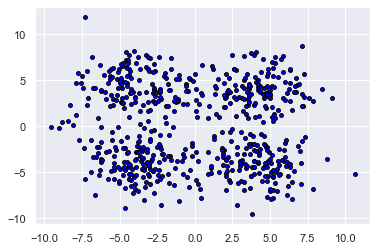

In [2]:
centers = [(-4, -4), (-4,4), (4,-4),  (4, 4)]
cluster_std = 2


X, y = make_blobs(n_samples=600, 
                  cluster_std=cluster_std, 
                  centers=centers, 
                  n_features=2, 
                  random_state=1)


plt.scatter(X[:,0], X[:,1], color="blue", edgecolors='black', s=15);

In [3]:
def plot_db(X, labels):
    df_db = pd.DataFrame(X)
    df_db['cluster'] = labels

    sns.scatterplot(data=df_db,
                    x=0, y=1,
                    hue="cluster", 
                    palette="deep");

In [4]:
db = DBSCAN(eps=1, min_samples=7).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

Número de Clusters: 4
Número de Ruídos: 73


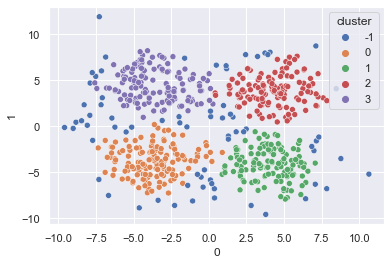

In [5]:
plot_db(X, labels)

### Clusters Naturais

In [6]:
from sklearn.datasets import make_moons

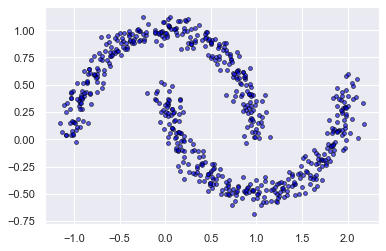

In [7]:
X, y = make_moons(600, noise=0.07, random_state=1)
plt.scatter(X[:,0], X[:,1], color="blue", edgecolors='black', alpha=.6, s=15);

In [8]:
db = DBSCAN(eps=.2, min_samples=4).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)


Número de Clusters: 2
Número de Ruídos: 0


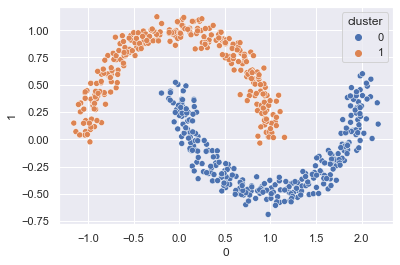

In [9]:
plot_db(X, labels)

## Algoritmo OPTICS
**Ordering Points To Identify Cluster Structure** (Ordenando Pontos Para Identificar a Estrutura do Grupo)

Densidade não precisa ser constante em todas as regiões.

O que é perto e o que é longe pode variar, dependendo por exemplo da região preço de casa ou tempo de viagem.

Encontrar o contexto

Calcular a distÂncia de todos os pontos para todos os pontos.

DIstância para ser um ponto core

Distância de um outro ponto ponto (reachability (acessibilidade)

### Pontos são acessíveis

**Conceitos Fundamentais**
* **Core Point** (Ponto Central): Um ponto, ou observação, que possui um número mínimo de pontos (```MinPts```) ao seu redor dentro de um raio ```Eps```. São pontos que estão no interior de um cluster.
* **Border Point** (Ponto de Fronteira): Um ponto, ou observação, que não possui em torno de si o número mínimo de pontos (```MinPts```), porém está dentro do raio ```Eps``` de ao menos um core point.
* **Noise** (Ruído): Pontos que não são core e também não são border. São observações muito diferentes e que estão isoladas dos demais pontos.

**Parametros**
* **MinPts**: Número mínimo de pontos que deve estar em volta de um ponto para que ele seja considerado um ponto central.
* **Eps**: Raio que deve ser observado em torno de um ponto para buscar por pontos próximos.

- - - 
**Vantagens**
* Não necessita do número de Clusters a priori
* Consegue encontrar Grupos com formatos arbitrários
* Por definição consegue lidar bem com outliers
* Consegue encontrar cluster com bases com dimensões variadas
* Possui apenas dois parâmetros, ```MinPts``` e ```Eps``` na prática ele é um valor grande o suficiente pra permitir a análise

**Desvantagens**
* Muito sensível aos parâmetros ```MinPts``` e ```Eps```
* Se a escala dos dados não for conhecida definir o valor de ```Eps``` (raio) pode ser muito díficil.

## Implementação do algoritmo OPTICS em Python

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS

from sklearn import metrics

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

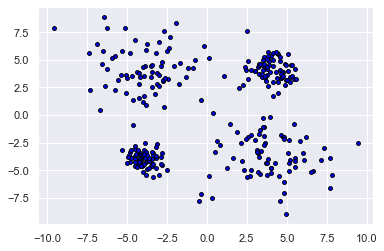

In [13]:
centers = [(-4, -4), (-4,4), (4,-4),  (4, 4)]
cluster_std = [.7, 2, 1.8, .9]

# n_samples=300
X, y = make_blobs(n_samples=300, 
                  cluster_std=cluster_std, 
                  centers=centers, 
                  n_features=2, 
                  random_state=1)

plt.scatter(X[:,0], X[:,1], color="blue", edgecolors='black', s=15);

In [14]:
def plot_db(X, labels):
    df_db = pd.DataFrame(X)
    df_db['cluster'] = labels

    sns.scatterplot(data=df_db,
                    x=0, y=1,
                    hue="cluster", 
                    palette="deep");

In [15]:
clust = OPTICS(min_samples=30, xi=0.05, min_cluster_size=0.05)

# Run the fit
opt = clust.fit(X)
labels = opt.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

Número de Clusters: 4
Número de Ruídos: 26


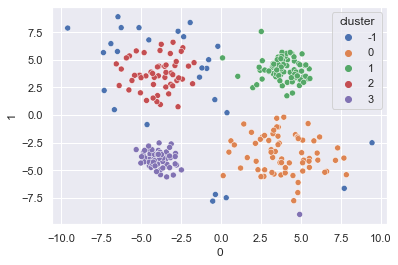

In [16]:
plot_db(X, labels)

Número de Clusters: 6
Número de Ruídos: 39


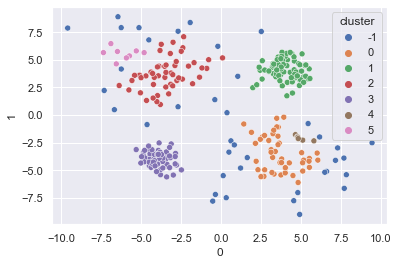

In [17]:
db = DBSCAN(eps=1, min_samples=5).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

plot_db(X, labels)

## Clusterização Baseada em Densidade na Prática

In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

In [19]:
data = pd.read_csv('data/tamanho_pinguins.csv')
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [20]:
data.isnull().sum()

especie          0
ilha             0
comp_bico_mm     2
larg_bico_mm     2
comp_asa_mm      2
peso_gr          2
sexo            10
dtype: int64

In [21]:
data = data.dropna()

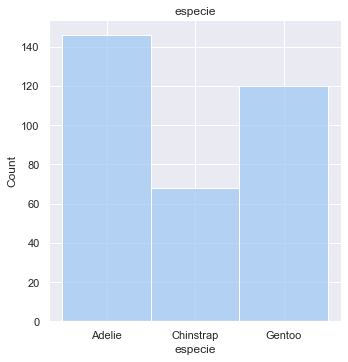

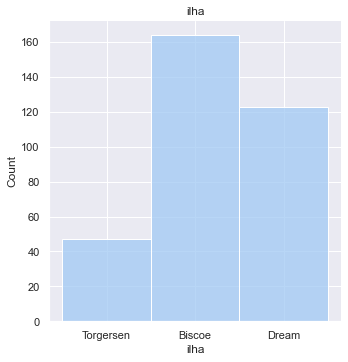

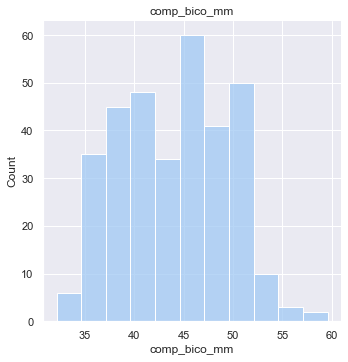

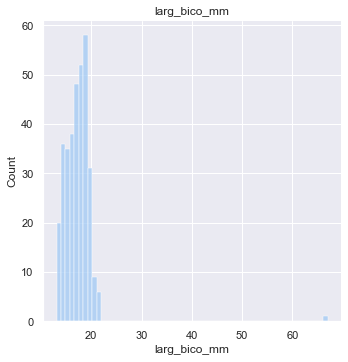

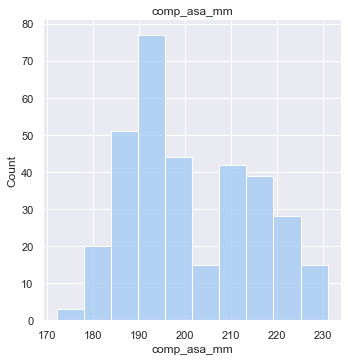

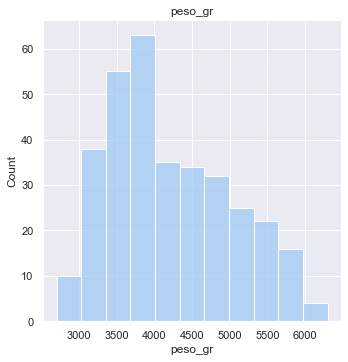

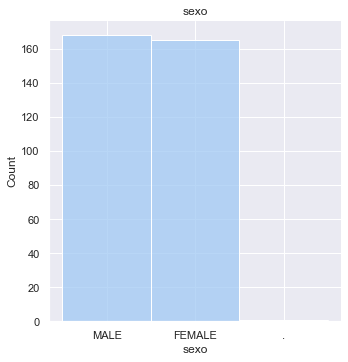

In [22]:
for c in data.columns:
    sns.displot(data[c]).set(title=c)
    plt.plot();

In [23]:

# excluir outliers
data = data[data.larg_bico_mm < 50]

In [24]:
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [25]:
x = X_[:, [0,2]]

In [26]:
db = DBSCAN(eps=.06, min_samples=7).fit(x)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

Número de Clusters: 3
Número de Ruídos: 28


In [27]:
df_db = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = labels

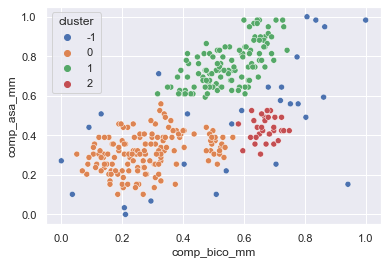

In [28]:
sns.scatterplot(data=df_db, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

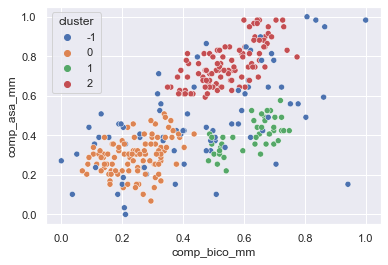

In [29]:
db = DBSCAN(eps=.1, min_samples=3).fit(X_)
labels = db.labels_

df_db = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = labels

sns.scatterplot(data=df_db, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");